# Introduction

Generally, aquiring population is impossible and its parameters are usually estimated via random sampling based on the Central Limit Theorem. However, in the real world (such as professional polling services), it is expensive to do sampling. So there exists a trade-off between sample size and estimation accuracy. What is a good compromise between the number of samples and the sample size? 

In order to answer it, this report conducted experiments on the Central Limit Theorem of statistics. Specifically, a dataset that has a fairly large number (several hundred) values was chosen and three population parameters (i.e., mean, median, standard deviation) were calculated. Then random sampling with different numbers of samples and different sample sizes was performed. Using the samples we estimated three population parameters, compared them with the actual values and discussed their distributions. 

## Preparation of Population Dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from statistics import mean
import random
from scipy import stats
import math

In [2]:
hospital_data = pd.read_csv('https://raw.githubusercontent.com/jade22/data/master/training_v2.csv')
heights_data = hospital_data[['height']].copy()
heights = heights_data.dropna() # check missing values and delete the records
heights = heights.reset_index(drop=True)

The dataset we choose describes some infomation about hospitals and their patients. Among the 186 attributes we focused on the height of patients in different hospitals. In the following analysis, we just employ it as the population and do relevant sampling, calculating and graphing. (It can be downloaded from: https://raw.githubusercontent.com/jade22/data/master/training_v2.csv)

## Examination of Population Dataset

### Population Statistics

In [3]:
heights.describe()

,height
count,90379.000000
mean,169.641588
std,10.795378
min,137.200000
25%,162.500000
50%,170.100000
75%,177.800000
max,195.590000


As shown by the table above, the mean, standard deviation and median of the population dataset are 169.6, 10.80 and 170.1 respectively. We will be comparing the sample statistics to the population statistics so we can determine how accurately we can calculate the population statistics using sample statistics for each statistic type. 

In [4]:
population_mean = float(heights.mean())
population_sd = float(heights.std())
population_median=float(heights.median())

### Distribution of Population Dataset

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'height values (cm)'),
 Text(0.5, 1.0, 'Population Dataset, mean = 169.64, median = 170.10, standard deviation = 10.80')]

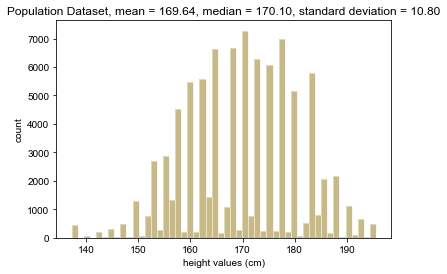

In [5]:
sns.distplot(heights,kde=False,hist=True)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(heights,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Population Dataset, mean = {population_mean:.2f}, median = {population_median:.2f}, standard deviation = {population_sd:.2f}'),xlabel='height values (cm)',ylabel='count')

As shown by the figure above, the distribution of the population dataset is not normal. 

## Generating Sample Datasets 
We need to generate sample datasets from the population datasets so we can use those samples to estimate the mean, standard deviation and median of the population dataset.

In [6]:
heights_list = list(heights['height'])

In [7]:
def random_sample_generator(population,sample_no,sample_size):
    """
    generate random samples for a population, number of samples and sample size.
    the poplulation value is a list and the number of samples and sample size are integers. 
    """
    
    sample_dict={}
    sample = 1 
    while sample < sample_no+1:
        sample_list = random.sample(population,sample_size)
        sample_dict[sample]=sample_list
        sample += 1 
    return sample_dict

## Calculating Means from Sample Datasets 
We can use the function below to calculate the mean from each sample dataset.

In [8]:
def calc_sample_means(sample_dict):
    """
    calculate the mean of the sample values stored in the dictionary. 
    """
    sample_means=[]
    for i in range(1,len(sample_dict)+1):
        sample_values = sample_dict.get(i)
        sample_mean = mean(sample_values)
        sample_means.append(sample_mean)
    return sample_means

## Mean Random Sampling Analysis

### 1000 Samples of Size 40
We will start with a sample size of 40 and 1000 samples. 

In [9]:
sample_dictionary_1000_40 = random_sample_generator(heights_list,1000,40)

In [10]:
sample_mean_values_1000_40 = calc_sample_means(sample_dictionary_1000_40)
sample_means_df_1000_40 = pd.DataFrame(data=sample_mean_values_1000_40,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 1000, Sample Size = 40, Mean = 169.68, Standard Error = 1.71')]

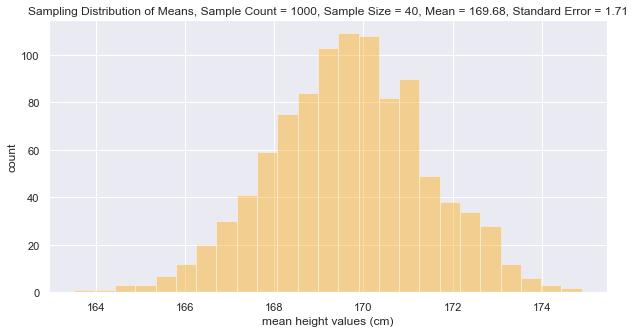

In [11]:
standard_error_40 = population_sd/math.sqrt(40)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_1000_40,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 1000, Sample Size = 40, Mean = {mean(sample_mean_values_1000_40):.2f}, Standard Error = {standard_error_40:.2f}'),xlabel='mean height values (cm)',ylabel='count')

#### Proximity of Sample Mean to Population Mean

In [12]:
sample_mean_1000_40 = mean(sample_mean_values_1000_40)
print(f'The sample mean is: {sample_mean_1000_40:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_1000_40):.2f}')
print(f'The sampling error is: {standard_error_40:.2f}')

The sample mean is: 169.68. The population mean is: 169.64
The difference between the population mean and the sample mean is -0.03
The sampling error is: 1.71


### 5000 Samples of Size 40

In [13]:
sample_dictionary_5000_40 = random_sample_generator(heights_list,5000,40)

In [14]:
sample_mean_values_5000_40 = calc_sample_means(sample_dictionary_5000_40)
sample_means_df_5000_40 = pd.DataFrame(data=sample_mean_values_5000_40,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 40, Mean = 169.65, Standard Error = 1.71')]

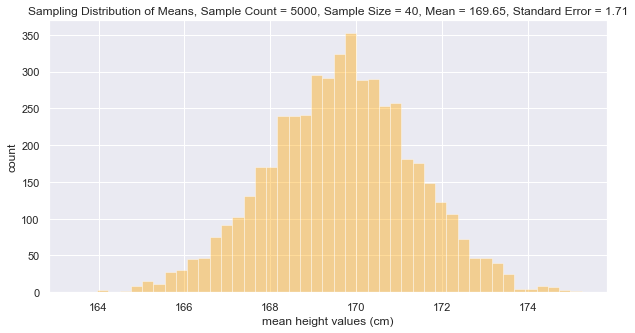

In [15]:
standard_error_40 = population_sd/math.sqrt(40)
sample_mean_5000_40 = mean(sample_mean_values_5000_40)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_5000_40,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 40, Mean = {sample_mean_5000_40:.2f}, Standard Error = {standard_error_40:.2f}'),xlabel='mean height values (cm)',ylabel='count')

#### Proximity of Sample Mean to Population Mean

In [16]:
standard_error_40 = population_sd/math.sqrt(40)
print(f'The sample mean is: {sample_mean_5000_40:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_5000_40):.2f}')
print(f'The sampling error is: {standard_error_40:.2f}')

The sample mean is: 169.65. The population mean is: 169.64
The difference between the population mean and the sample mean is -0.00
The sampling error is: 1.71


### 10000 Samples of Size 40

In [17]:
sample_dictionary_10000_40 = random_sample_generator(heights_list,10000,40)

In [18]:
sample_mean_values_10000_40 = calc_sample_means(sample_dictionary_10000_40)
sample_means_df_10000_40 = pd.DataFrame(data=sample_mean_values_10000_40,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 40, Mean = 169.62, Standard Error = 1.71')]

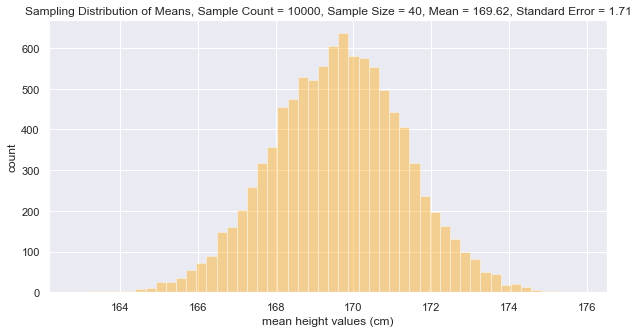

In [19]:
standard_error_40 = population_sd/math.sqrt(40)
sample_mean_10000_40 = mean(sample_mean_values_10000_40)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_10000_40,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 40, Mean = {sample_mean_10000_40:.2f}, Standard Error = {standard_error_40:.2f}'),xlabel='mean height values (cm)',ylabel='count')

#### Proximity of Sample Mean to Population Mean

In [20]:
standard_error_40 = population_sd/math.sqrt(40)
print(f'The sample mean is: {sample_mean_10000_40:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_10000_40):.2f}')
print(f'The sampling error is: {standard_error_40:.2f}')

The sample mean is: 169.62. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.02
The sampling error is: 1.71


### 5000 Samples of Size 100

In [21]:
sample_dictionary_5000_100 = random_sample_generator(heights_list,5000,100)

In [22]:
sample_mean_values_5000_100 = calc_sample_means(sample_dictionary_5000_100)
sample_means_df_5000_100 = pd.DataFrame(data=sample_mean_values_5000_100,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 100, Mean = 169.64, Standard Error = 1.08')]

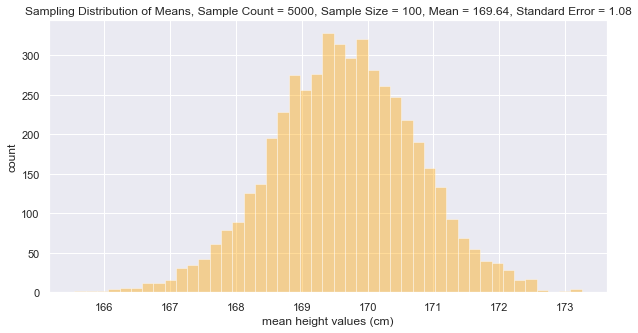

In [23]:
standard_error_100 = population_sd/math.sqrt(100)
sample_mean_5000_100 = mean(sample_mean_values_5000_100)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_5000_100,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 100, Mean = {sample_mean_5000_100:.2f}, Standard Error = {standard_error_100:.2f}'),xlabel='mean height values (cm)',ylabel='count')

#### Proximity of Sample Mean to Population Mean

In [24]:
standard_error_100 = population_sd/math.sqrt(100)
print(f'The sample mean is: {sample_mean_5000_100:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_5000_100):.2f}')
print(f'The sampling error is: {(standard_error_100):.2f}')

The sample mean is: 169.64. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.00
The sampling error is: 1.08


### 5000 Samples of Size 250

In [25]:
sample_dictionary_5000_250 = random_sample_generator(heights_list,5000,250)

In [26]:
sample_mean_values_5000_250 = calc_sample_means(sample_dictionary_5000_250)
sample_means_df_5000_250 = pd.DataFrame(data=sample_mean_values_5000_250,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 250, Mean = 169.63, Standard Error = 0.68')]

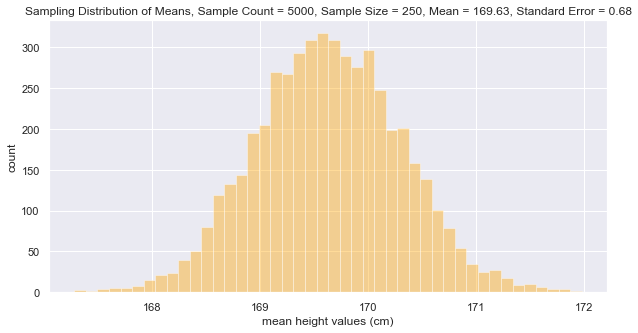

In [27]:
standard_error_250 = population_sd/math.sqrt(250)
sample_mean_5000_250 = mean(sample_mean_values_5000_250)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_5000_250,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 250, Mean = {sample_mean_5000_250:.2f}, Standard Error = {standard_error_250:.2f}'),xlabel='mean height values (cm)',ylabel='count')

In [28]:
standard_error_250 = population_sd/math.sqrt(250)
print(f'The sample mean is: {sample_mean_5000_250:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_5000_250):.2f}')
print(f'The sampling error is: {standard_error_250:.2f}')

The sample mean is: 169.63. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.01
The sampling error is: 0.68


### 10000 Samples of Size 100

In [29]:
sample_dictionary_10000_100 = random_sample_generator(heights_list,10000,100)

In [30]:
sample_mean_values_10000_100 = calc_sample_means(sample_dictionary_10000_100)
sample_means_df_10000_100 = pd.DataFrame(data=sample_mean_values_10000_100,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 100, Mean = 169.65, Standard Error = 1.08')]

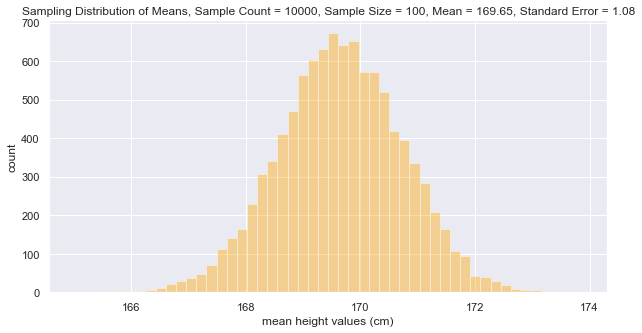

In [31]:
standard_error_100 = population_sd/math.sqrt(100)
sample_mean_10000_100 = mean(sample_mean_values_10000_100)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_10000_100,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 100, Mean = {sample_mean_10000_100:.2f}, Standard Error = {standard_error_100:.2f}'),xlabel='mean height values (cm)',ylabel='count')

In [32]:
standard_error_100 = population_sd/math.sqrt(100)
print(f'The sample mean is: {sample_mean_10000_100:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_10000_100):.2f}')
print(f'The sampling error is: {standard_error_100:.2f}')

The sample mean is: 169.65. The population mean is: 169.64
The difference between the population mean and the sample mean is -0.01
The sampling error is: 1.08


### 10000 Samples of Size 250

In [33]:
sample_dictionary_10000_250 = random_sample_generator(heights_list,10000,250)

In [34]:
sample_mean_values_10000_250 = calc_sample_means(sample_dictionary_10000_250)
sample_means_df_10000_250 = pd.DataFrame(data=sample_mean_values_10000_250,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 250, Mean = 169.64, Standard Error = 0.68')]

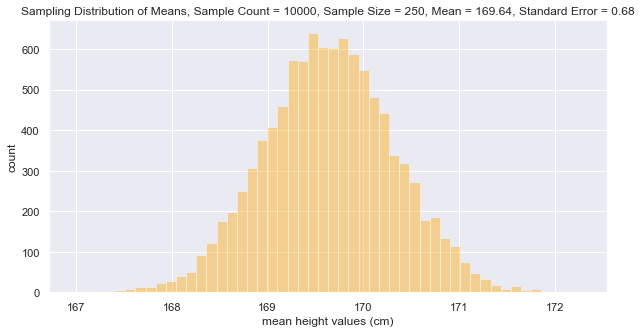

In [35]:
standard_error_250 = population_sd/math.sqrt(250)
sample_mean_10000_250 = mean(sample_mean_values_10000_250)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_10000_250,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 250, Mean = {sample_mean_10000_250:.2f}, Standard Error = {standard_error_250:.2f}'),xlabel='mean height values (cm)',ylabel='count')

In [36]:
standard_error_250 = population_sd/math.sqrt(250)
print(f'The sample mean is: {sample_mean_10000_250:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_10000_250):.2f}')
print(f'The sampling error is: {standard_error_250:.2f}')

The sample mean is: 169.64. The population mean is: 169.64
The difference between the population mean and the sample mean is -0.00
The sampling error is: 0.68


## Median Random Sampling Analysis

In [37]:
def calc_sample_median(sample_dict):
    """
    calculate the mean of the sample values stored in the dictionary. 
    """
    sample_medians=[]
    for i in range(1,len(sample_dict)+1):
        sample_values = sample_dict.get(i)
        sample_median = np.median(sample_values)
        sample_medians.append(sample_median)
    return sample_medians

### 1000 Samples of Size 40

In [38]:
sample_dictionary_1000_40 = random_sample_generator(heights_list,1000,40)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 40, Mean = 169.67, Standard Error = 1.71')]

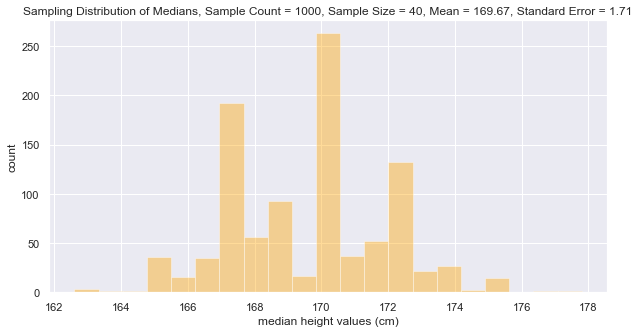

In [39]:
sample_median_values_1000_40 = calc_sample_median(sample_dictionary_1000_40)
sample_median_df_1000_40 = pd.DataFrame(data=sample_median_values_1000_40,columns=['median'])

standard_error_40 = population_sd/math.sqrt(40)
sample_mean_1000_40 = mean(sample_median_values_1000_40)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_1000_40,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 40, Mean = {sample_mean_1000_40:.2f}, Standard Error = {standard_error_40:.2f}'),xlabel='median height values (cm)',ylabel='count')

#### Proximity of Estimated Median to Population Median

In [40]:
sample_median_1000_40 = mean(sample_median_values_1000_40)
standard_error_40 = population_sd/math.sqrt(40)
print(f'The sample median is: {sample_median_1000_40:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_1000_40):.2f}')
print(f'The sampling error is: {standard_error_40:.2f}')

The sample median is: 169.67. The population mean is: 170.10
The difference between the population median and the sample median is 0.43
The sampling error is: 1.71


### 1000 Samples of Size 100

In [41]:
sample_dictionary_1000_100 = random_sample_generator(heights_list,1000,100)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 100, Mean = 169.61, Standard Error = 1.08')]

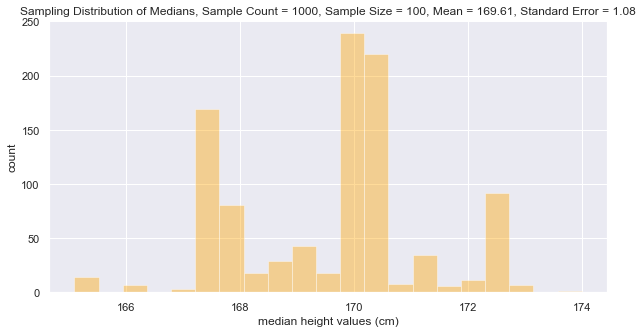

In [42]:
sample_median_values_1000_100 = calc_sample_median(sample_dictionary_1000_100)
sample_median_df_1000_100 = pd.DataFrame(data=sample_median_values_1000_100,columns=['median'])

standard_error_100 = population_sd/math.sqrt(100)
sample_mean_1000_100 = mean(sample_median_values_1000_100)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_1000_100,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 100, Mean = {sample_mean_1000_100:.2f}, Standard Error = {standard_error_100:.2f}'),xlabel='median height values (cm)',ylabel='count')

#### Proximity of Estimated Median to Population Median

In [43]:
sample_median_1000_100 = mean(sample_median_values_1000_100)
standard_error_100 = population_sd/math.sqrt(100)
print(f'The sample median is: {sample_median_1000_100:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_1000_100):.2f}')
print(f'The sampling error is: {standard_error_100:.2f}')

The sample median is: 169.61. The population mean is: 170.10
The difference between the population median and the sample median is 0.49
The sampling error is: 1.08


### 5000 Samples of Size 100

In [44]:
sample_dictionary_5000_100 = random_sample_generator(heights_list,5000,100)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 5000, Sample Size = 100, Mean = 169.65, Standard Error = 1.08')]

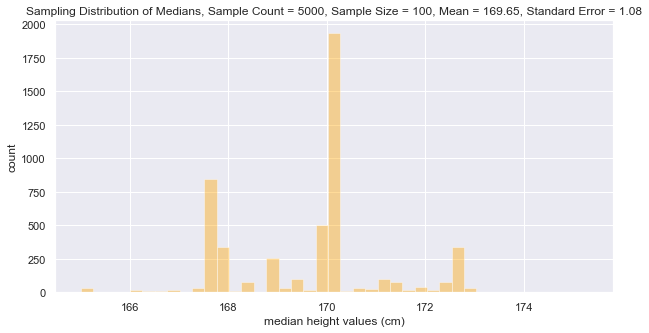

In [45]:
sample_median_values_5000_100 = calc_sample_median(sample_dictionary_5000_100)
sample_median_df_5000_100 = pd.DataFrame(data=sample_median_values_5000_100,columns=['median'])

standard_error_100 = population_sd/math.sqrt(100)
sample_mean_5000_100 = mean(sample_median_values_5000_100)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_5000_100,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 5000, Sample Size = 100, Mean = {sample_mean_5000_100:.2f}, Standard Error = {standard_error_100:.2f}'),xlabel='median height values (cm)',ylabel='count')

#### Proximity of Estimated Median to Population Median

In [46]:
sample_median_5000_100 = mean(sample_median_values_5000_100)
standard_error_100 = population_sd/math.sqrt(100)
print(f'The sample median is: {sample_median_5000_100:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_5000_100):.2f}')
print(f'The sampling error is: {standard_error_100:.2f}')

The sample median is: 169.65. The population mean is: 170.10
The difference between the population median and the sample median is 0.45
The sampling error is: 1.08


### 1000 Samples of Size 250

In [47]:
sample_dictionary_1000_250 = random_sample_generator(heights_list,1000,250)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 250, Mean = 169.71, Standard Error = 0.68')]

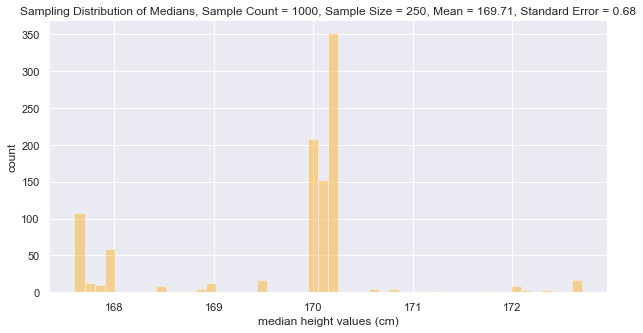

In [48]:
sample_median_values_1000_250 = calc_sample_median(sample_dictionary_1000_250)
sample_median_df_1000_250 = pd.DataFrame(data=sample_median_values_1000_250,columns=['median'])

standard_error_250 = population_sd/math.sqrt(250)
sample_mean_1000_250 = mean(sample_median_values_1000_250)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_1000_250,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 250, Mean = {sample_mean_1000_250:.2f}, Standard Error = {standard_error_250:.2f}'),xlabel='median height values (cm)',ylabel='count')

#### Proximity of Estimated Median to Population Median

In [49]:
sample_median_1000_250 = mean(sample_median_values_1000_250)
standard_error_250 = population_sd/math.sqrt(250)
print(f'The sample median is: {sample_median_1000_250:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_1000_250):.2f}')
print(f'The sampling error is: {standard_error_250:.2f}')

The sample median is: 169.71. The population mean is: 170.10
The difference between the population median and the sample median is 0.39
The sampling error is: 0.68


### 10000 Samples of Size 250

In [50]:
sample_dictionary_10000_250 = random_sample_generator(heights_list,10000,250)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 10000, Sample Size = 250, Mean = 169.66, Standard Error = 0.68')]

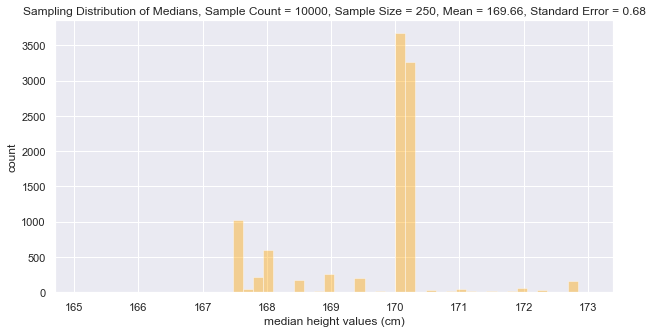

In [51]:
sample_median_values_10000_250 = calc_sample_median(sample_dictionary_10000_250)
sample_median_df_10000_250 = pd.DataFrame(data=sample_median_values_10000_250,columns=['median'])

standard_error_250 = population_sd/math.sqrt(250)
sample_mean_10000_250 = mean(sample_median_values_10000_250)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_10000_250,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 10000, Sample Size = 250, Mean = {sample_mean_10000_250:.2f}, Standard Error = {standard_error_250:.2f}'),xlabel='median height values (cm)',ylabel='count')

As shown by the figure above, even when a large number of sample sizes and sample size was used, the distribution of the sample medians was not normal.

#### Proximity of Estimated Median to Population Median

In [52]:
sample_median_10000_250 = mean(sample_median_values_10000_250)
standard_error_250 = population_sd/math.sqrt(250)
print(f'The sample median is: {sample_median_10000_250:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_10000_250):.2f}')
print(f'The sampling error is: {standard_error_250:.2f}')

The sample median is: 169.66. The population mean is: 170.10
The difference between the population median and the sample median is 0.44
The sampling error is: 0.68


## Standard Deviation Random Sample Analysis

In [53]:
def repeated_random_sampling_stds(samp_n, popul_data, samp_s):
    '''
    Select samp_n elements randomly from a given population and calculate the sample's standard deviation.
    Repeat this process for samp_n times.
    @param samp_n: sampling number, i.e., the number that the random sampling will be done
    @param popul_data: the given population
    @param samp_s: sample size,the number of the items which will be choosen from a population in each sampling
    @return a list containing samp_n length floating point value, each of which is every sample's standard deviation.
    '''
    
    samp_stds = []
    for i in range(samp_n):
        r_samp = random.sample(popul_data, samp_s)
        samp_stds.append(statistics.pstdev(r_samp))
        print
    return samp_stds

In [54]:
def data_distribution (data, samp_n, samp_s, samp_std_mean, samp_std_std):
    '''
    Return the distribution of sample's median.
    @param data: the given data
    @param samp_n: sampling number
    @param samp_s: sample size
    @param samp_std_mean: the average of the given data
    @param samp_std_std: the standard error of the given data
    @return: a histgram
    '''
    
    sns.set_style('darkgrid')
    hist = sns.distplot(data, hist=True, kde=False, 
             bins=int(180/5), color = 'orange')
    plt.title(f'Sampling distribution of standard deviation, '+
              f'sample count ={samp_n}, sample size = {samp_s}, '+
              f'mean = {samp_std_mean:.2f}, standard error = {samp_std_std:.2f}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    sns.set(rc={'figure.figsize':(10,5)})
    return

### 100 Samples of Size 40


est_popul_std_100_40 = 10.54



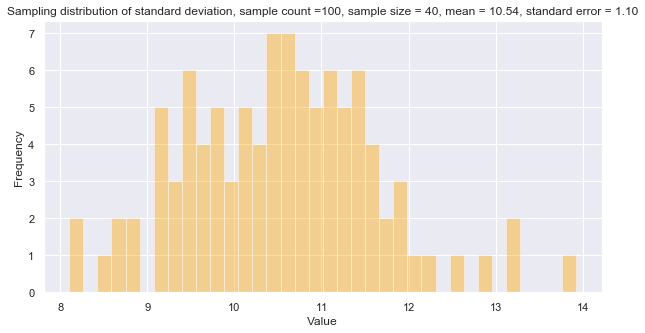

In [55]:
popul_data = heights_list
samp_n = 100
samp_s = 40
samp_stds_100_40 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_100_40 = np.mean(samp_stds_100_40)
samp_std_std_100_40 = statistics.pstdev(samp_stds_100_40)
print()
print(f'est_popul_std_100_40 = {est_std_100_40:.2f}')
print()
data_distribution(samp_stds_100_40, samp_n, samp_s, est_std_100_40, samp_std_std_100_40)

In [56]:
print()
print(f'The sampling number and sample size are set as 100 and 40 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_100_40:.2f} "+ 
      f'and a standard error of {samp_std_std_100_40:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_100_40:.2f}.")
print()


The sampling number and sample size are set as 100 and 40 respectively. The sample's standard deviation has a mean of 10.54 and a standard error of 1.10. The esimation of population's standard deviation is 10.54.



### 1000 Samples of Size 40


est_popul_std_1000_40 = 10.59



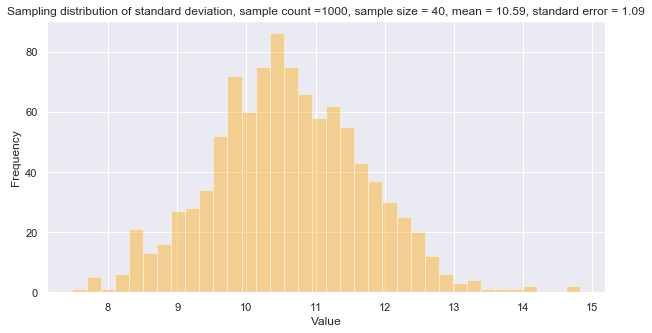

In [57]:
popul_data = heights_list
samp_n = 1000
samp_s = 40
samp_stds_1000_40 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_1000_40 = np.mean(samp_stds_1000_40)
samp_std_std_1000_40 = statistics.pstdev(samp_stds_1000_40)
print()
print(f'est_popul_std_1000_40 = {est_std_1000_40:.2f}')
print()
data_distribution(samp_stds_1000_40, samp_n, samp_s, est_std_1000_40, samp_std_std_1000_40)

In [58]:
print()
print(f'The sampling number and sample size are set as 1000 and 40 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_1000_40:.2f} "+ 
      f'and a standard error of {samp_std_std_1000_40:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_1000_40:.2f}.")
print()


The sampling number and sample size are set as 1000 and 40 respectively. The sample's standard deviation has a mean of 10.59 and a standard error of 1.09. The esimation of population's standard deviation is 10.59.



### 5000 Samples of Size 40


est_popul_std_5000_40 = 10.59



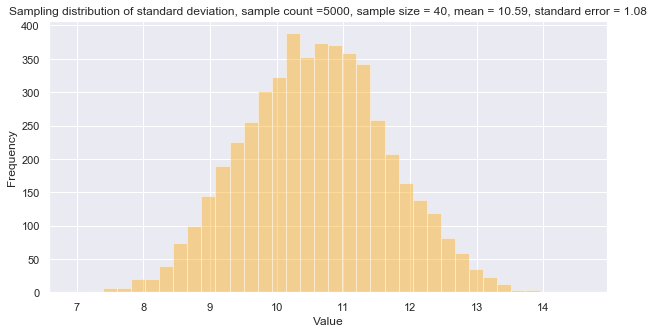

In [59]:
popul_data = heights_list
samp_n = 5000
samp_s = 40
samp_stds_5000_40 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_5000_40 = np.mean(samp_stds_5000_40)
samp_std_std_5000_40 = statistics.pstdev(samp_stds_5000_40)
print()
print(f'est_popul_std_5000_40 = {est_std_5000_40:.2f}')
print()
data_distribution(samp_stds_5000_40, samp_n, samp_s, est_std_5000_40, samp_std_std_5000_40)

In [60]:
print()
print(f'The sampling number and sample size are set as 5000 and 40 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_5000_40:.2f} "+ 
      f'and a standard error of {samp_std_std_5000_40:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_5000_40:.2f}.")
print()


The sampling number and sample size are set as 5000 and 40 respectively. The sample's standard deviation has a mean of 10.59 and a standard error of 1.08. The esimation of population's standard deviation is 10.59.



### 10000 Samples of Size 40


est_popul_std_10000_40 = 10.60



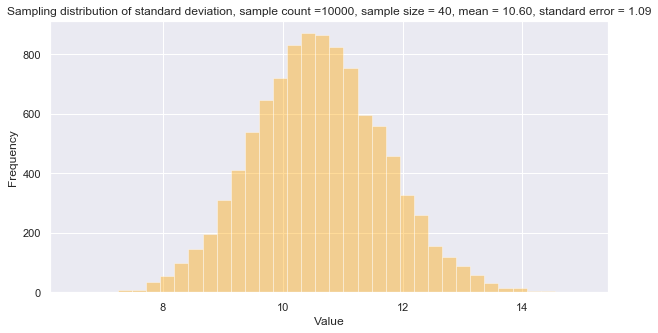

In [61]:
popul_data = heights_list
samp_n = 10000
samp_s = 40
samp_stds_10000_40 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_10000_40 = np.mean(samp_stds_10000_40)
samp_std_std_10000_40 = statistics.pstdev(samp_stds_10000_40)
print()
print(f'est_popul_std_10000_40 = {est_std_10000_40:.2f}')
print()
data_distribution(samp_stds_10000_40, samp_n, samp_s, est_std_10000_40, samp_std_std_10000_40)

In [62]:
print()
print(f'The sampling number and sample size are set as 10000 and 40 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_10000_40:.2f} "+ 
      f'and a standard error of {samp_std_std_10000_40:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_10000_40:.2f}.")
print()


The sampling number and sample size are set as 10000 and 40 respectively. The sample's standard deviation has a mean of 10.60 and a standard error of 1.09. The esimation of population's standard deviation is 10.60.



<p>The resuls for the first three samples indicate that the estimation of population's standard deviation is becoming closer to the actual value. The graph of sampling distribution is becoming smoother and increasingly like the normal distribution as the sampling number increases. <p>
<p>However, compared with the third sample, the estimations of the fourth is not better. But the sampling number is much larger, 5 times of that of the third sample, which means a huge cost. As a result, we choose 5000 as the sampling number when we do trials to find out the suitable sample size in the following analysis.<p>

### 5000 Samples of Size of 100


est_popul_std_5000_100 = 10.71



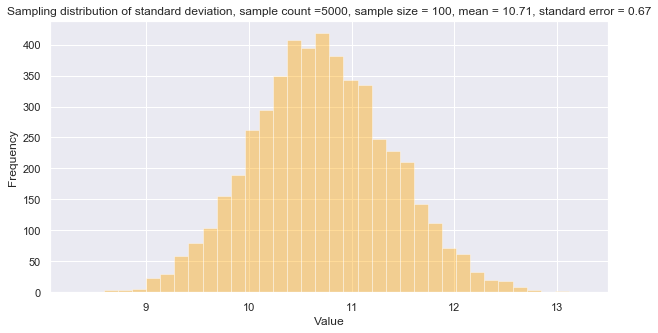

In [63]:
popul_data = heights_list
samp_n = 5000
samp_s = 100
samp_stds_5000_100 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_5000_100 = np.mean(samp_stds_5000_100)
samp_std_std_5000_100 = statistics.pstdev(samp_stds_5000_100)
print()
print(f'est_popul_std_5000_100 = {est_std_5000_100:.2f}')
print()
data_distribution(samp_stds_5000_100, samp_n, samp_s, est_std_5000_100, samp_std_std_5000_100)

In [64]:
print()
print(f'The sampling number and sample size are set as 5000 and 100 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_5000_100:.2f} "+ 
      f'and a standard error of {samp_std_std_5000_100:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_5000_100:.2f}.")
print()


The sampling number and sample size are set as 5000 and 100 respectively. The sample's standard deviation has a mean of 10.71 and a standard error of 0.67. The esimation of population's standard deviation is 10.71.



### 5000 Samples of Size 500


est_popul_std_5000_500 = 10.78



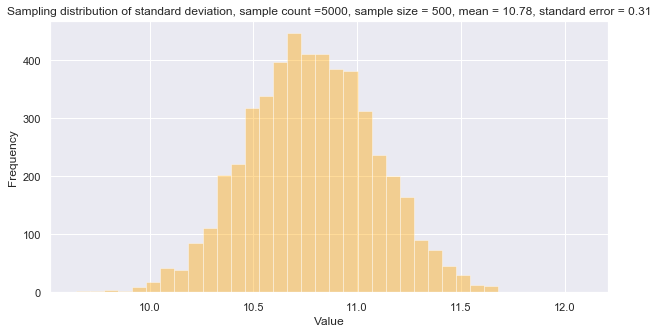

In [65]:
popul_data = heights_list
samp_n = 5000
samp_s = 500
samp_stds_5000_500 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_5000_500 = np.mean(samp_stds_5000_500)
samp_std_std_5000_500 = statistics.pstdev(samp_stds_5000_500)
print()
print(f'est_popul_std_5000_500 = {est_std_5000_500:.2f}')
print()
data_distribution(samp_stds_5000_500, samp_n, samp_s, est_std_5000_500, samp_std_std_5000_500)

In [66]:
print()
print(f'The sampling number and sample size are set as 5000 and 500 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_5000_500:.2f} "+ 
      f'and a standard error of {samp_std_std_5000_500:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_5000_500:.2f}.")
print()


The sampling number and sample size are set as 5000 and 500 respectively. The sample's standard deviation has a mean of 10.78 and a standard error of 0.31. The esimation of population's standard deviation is 10.78.



### 5000 Samples of Size 1000


est_popul_std_5000_1000 = 10.79



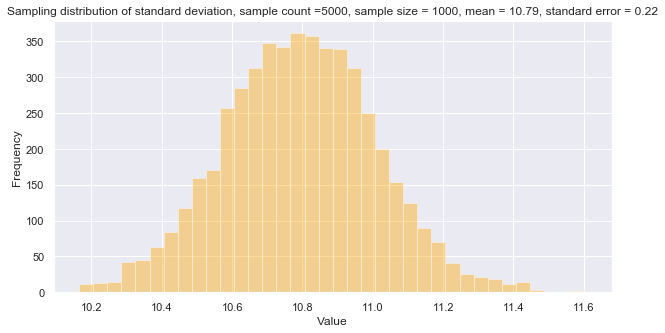

In [67]:
popul_data = heights_list
samp_n = 5000
samp_s = 1000
samp_stds_5000_1000 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_5000_1000 = np.mean(samp_stds_5000_1000)
samp_std_std_5000_1000 = statistics.pstdev(samp_stds_5000_1000)
print()
print(f'est_popul_std_5000_1000 = {est_std_5000_1000:.2f}')
print()
data_distribution(samp_stds_5000_1000, samp_n, samp_s, est_std_5000_1000, samp_std_std_5000_1000)

In [68]:
print()
print(f'The sampling number and sample size are set as 5000 and 1000 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_5000_1000:.2f} "+ 
      f'and a standard error of {samp_std_std_5000_1000:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_5000_1000:.2f}.")
print()


The sampling number and sample size are set as 5000 and 1000 respectively. The sample's standard deviation has a mean of 10.79 and a standard error of 0.22. The esimation of population's standard deviation is 10.79.



## Results Summary

### Estimation of Population Mean
As shown below, the sampling that allowed for the closed estimation of the mean was 5000 samples of size 250 and 10000 samples of size 100. Given the sampling costs, 5000 samples of size 250 is the optimum choice for estimating the population mean.

In [69]:
print(f'The Difference Between the Population and Estimated Mean:')
print(f'1000 Samples of Size 40: {abs(population_mean-sample_mean_1000_40):.3f}')
print(f'5000 Samples of Size 40: {abs(population_mean-sample_mean_5000_40):.3f}')
print(f'10000 Samples of Size 40: {abs(population_mean-sample_mean_10000_40):.3f}')
print(f'5000 Samples of Size 100: {abs(population_mean-sample_mean_5000_100):.3f}')
print(f'5000 Samples of Size 250: {abs(population_mean-sample_mean_5000_250):.3f}')
print(f'10000 Samples of Size 100: {abs(population_mean-sample_mean_10000_100):.3f}')
print(f'10000 Samples of Size 250: {abs(population_mean-sample_mean_10000_250):.3f}')

The Difference Between the Population and Estimated Mean:
1000 Samples of Size 40: 0.027
5000 Samples of Size 40: 0.005
10000 Samples of Size 40: 0.022
5000 Samples of Size 100: 0.012
5000 Samples of Size 250: 0.007
10000 Samples of Size 100: 0.006
10000 Samples of Size 250: 0.023


### Estimation of Population Median
As shown below, the estimation of the population median was not as accurate as the other two parameters. Given the results below, the sample that allows the most accurate estimation of the population median appears to be 10000 samples of size 250. However, given that the accuracy of this sampling is fairly close to the other samples, it may be appropriate to pick a lower sampling of 1000 samples of size 250 to reduce sampling costs.

In [70]:
print(f'The Difference Between the Population and Estimated Median:')
print(f'1000 Samples of Size 40: {abs(population_median-sample_median_1000_40):.3f}')
print(f'1000 Samples of Size 100: {abs(population_median-sample_median_1000_100):.3f}')
print(f'5000 Samples of Size 100: {abs(population_median-sample_median_5000_100):.3f}')
print(f'1000 Samples of Size 250: {abs(population_median-sample_median_1000_250):.3f}')
print(f'10000 Samples of Size 250: {abs(population_median-sample_median_10000_250):.3f}')

The Difference Between the Population and Estimated Median:
1000 Samples of Size 40: 0.432
1000 Samples of Size 100: 0.490
5000 Samples of Size 100: 0.446
1000 Samples of Size 250: 0.390
10000 Samples of Size 250: 0.436


### Estimation of Population Standard Deviation
As shown below, a sampling of 5000 samples of size 500 provide an estimate that was signifcantly better than the other samplings. Therefore, this is the best sampling choice out of the tested samplings. 

In [71]:
print(f'The Difference Between the Population and Estimated Standard Deviation:')
print(f'100 Samples of Size 40: {abs(population_sd-est_std_100_40):.3f}')
print(f'1000 Samples of Size 40: {abs(population_sd-est_std_1000_40):.3f}')
print(f'5000 Samples of Size 40: {abs(population_sd-est_std_5000_40):.3f}')
print(f'5000 Samples of Size 100: {abs(population_sd-est_std_5000_100):.3f}')
print(f'5000 Samples of Size 500: {abs(population_sd-est_std_5000_500):.3f}')

The Difference Between the Population and Estimated Standard Deviation:
100 Samples of Size 40: 0.260
1000 Samples of Size 40: 0.204
5000 Samples of Size 40: 0.204
5000 Samples of Size 100: 0.085
5000 Samples of Size 500: 0.016


## Discussion

### Central Limit Theorem

The results for the estimation of the population’s mean and standard deviation were what we would expect according to the Central Limit Theorem. In general, the  sampling distributions of the mean and standard deviation are increasingly normal as the sampling number and sample size is increased. Increasing the number of samples smooths the graph of the sampling distribution and a large sample size makes the graph narrower as the values are more centralized. The estimated mean and standard deviation are also closer to the actual values when the number of samples and sample size is increased. As the sample size is increased, the standard error of sampling distribution decreases, meaning that the distribution of the sample’s statistics are increasingly concentrated on certain values. 

The results for the estimation of the median of the population are not consistent with what we would expect according to the Central Limit Theorem. The sample median values did not display normal distribution for all the sample sizes and number of samples that were tested. The graphs indicate that the sample’s median values are mostly centralized around 170. We found that increasing the number of samples and the sample size didn’t improve the accuracy of the estimation. We calculated a median estimation of 170.09, which is very close to the actual mean value of 170.10 using only 1000 samples of size 100. Based on our results, the behaviour of this parameter is unusual and is any area that requires further explanation. 

### Trade-off Between Number of Samples and Sample Size

Through our work we found that increasing the number of samples and the sample size does not always guarantee a more accurate estimate of the population data. We found that there was a trade-off between increasing the number of samples and the sample size. 

For the mean of our population, the sample we tried that gave the best estimate was 10,000 samples with size 100. However, this scenario is too computationally expensive to conduct in the real world because of large number of samples and limited return on investment, as we did not find a big difference in accuracy by increasing the number of samples to 10,000. As a result, 5000 samples of size 250 is the best given this trade off, as it still gives us an accurate estimation. 

For estimation of the median, we found that less samples were needed to get the best estimate. Based on our results, we found that 1000 samples of size 100 provided the best estimate of the sample median.  

As for the standard deviation, a larger sample number and sample size are required to estimate the parameter precisely compared to the mean and median. Nevertheless, there is also a limit here. For our population, when the sampling number and the sample size exceed 5000 and 500 respectively, the improvement of the estimation is limited. We also found that increasing the number of samples from 5000 to 10000 did not provide a significantly better estimation of the population standard deviation, but would result in a much larger sampling cost. When comparing the results from using 5000 samples of size 1000 to using 5000 samples of size 500 we found that increasing the sample size by two time did not significantly improve the estimation of the standard deviation. Given these sampling costs, we think that a 5000 sample of size 500 is the best choice for estimating the standard deviation of our population dataset. 


### Parameter Comparison

Based on our results, we found that the median was the most challenging to estimate. As shown by our results, we weren’t able to get an estimation as close to the actual median as we did for the mean and standard deviation. We found that the plotted distributions of sample medians did not approach a normal distribution as we increased the number of samples, even when we used 10,000 samples. This was an unexpected result as we expected the median to behave similarly to the mean. 

In general, we think that the standard deviation is difficult to estimate as a larger number of samples  was required to get an accurate estimation of the population data. Comparing the results for 5000 samples of size 100 for the estimation of the standard deviation and the mean, we can see that the estimated mean was much closer to the population statistics than the estimated standard deviation. 

The mean was the easiest to estimate as we were able to get relatively good estimates of the population mean at lower sample counts and sample sizes compared with the other two parameters. Based on our findings, if we had to rank the parameters by the required number of samples, we would rank them as mean as requiring the least number of samples, followed by the standard deviation, followed by the median. 

The results for the estimation of the median require additional work to determine why the sample median values are not approaching a normal distribution. It is unclear whether we would be able to increase the number of samples to a value large enough to get an accurate estimate for the median. 

Examining the sample size required to get normally distributed sample statistics, we can see that we were able to get normally distributed data for the mean and standard deviation at a low sample size of 40, whereas for the median we weren’t able to get normally distributed sample values. The sample mean values looked slightly more normal at a sample size of 40 compared with the standard deviation, so we would rank the parameters as follows: mean requires the lowest sample size to get normally distributed sample statistics, followed by the standard deviation and the median. 